In [1]:
from tensorflow.python.client import device_lib

def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

print(get_available_devices())

['/device:CPU:0', '/device:GPU:0']


# Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Loading data

In [4]:
train_new_data = pd.read_csv("new_data/train_new_data_f.csv")
train_new_target = pd.read_csv("new_data/train_new_target1.csv")
test_new_data = pd.read_csv("new_data/test_new_data_f.csv")
test_new_target = pd.read_csv("new_data/test_new_target1.csv")

In [5]:
train_old_data = pd.read_csv("new_data/train_old_data_f.csv")
train_old_target = pd.read_csv("new_data/train_old_target1.csv")
test_old_data = pd.read_csv("new_data/test_old_data_f.csv")
test_old_target = pd.read_csv("new_data/test_old_target1.csv")

# Concat the new and old data to make final dataset

In [6]:
frame_train_data = [train_old_data,train_new_data]
frame_train_target = [train_old_target,train_new_target]
frame_test_data = [test_old_data,test_new_data]
frame_test_target = [test_old_target,test_new_target]

In [7]:
train_dataf = pd.concat(frame_train_data)
train_targetf = pd.concat(frame_train_target)
test_dataf = pd.concat(frame_test_data)
test_targetf = pd.concat(frame_test_target)

In [8]:
train_dataf.head()

,State_ AK,State_ AL,State_ AR,State_ AZ,State_ CA,State_ CO,State_ CT,State_ DC,State_ DE,State_ FL,...,City_imporatnce_Low,City_imporatnce_Medium,State_imporatnce_High,State_imporatnce_Low,State_imporatnce_Medium,Year,Mileage,City_mean_price,Brand_popularity,Model_level
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,2003,155305,19223.186538,3,1
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,2005,120131,15447.120968,1,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2000,130023,18931.471066,1,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2005,132857,20749.935290,1,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2005,171571,18709.021727,3,1


# Normalize the data

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train_dataf)
train_dataf_std = scaler.transform(train_dataf)


test_dataf_std = scaler.transform(test_dataf)

# Model Building

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [11]:
from tensorflow.keras.losses import MeanSquaredLogarithmicError
msle = MeanSquaredLogarithmicError()

In [18]:
def build_model():
    model = tf.keras.Sequential([
      tf.keras.layers.Dense(256, activation='relu', input_shape=(65,)),
      tf.keras.layers.Dense(256, activation='relu'),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(1, activation='linear')
    ])

    optimizer = tf.keras.optimizers.Adam(0.01)

    model.compile(loss=msle,
                optimizer=optimizer,
                metrics=[msle])
    return model

In [19]:
model = build_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               16896     
                                                                 
 dense_6 (Dense)             (None, 256)               65792     
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 128)               16512     
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 1)                

In [20]:
historyf = model.fit(
  train_dataf_std, train_targetf,
  epochs=10, validation_split = 0.2, verbose=2,batch_size=100
  )

Epoch 1/10
8779/8779 - 69s - loss: 0.2025 - mean_squared_logarithmic_error: 0.2025 - val_loss: 0.1466 - val_mean_squared_logarithmic_error: 0.1466 - 69s/epoch - 8ms/step
Epoch 2/10
8779/8779 - 68s - loss: 0.1518 - mean_squared_logarithmic_error: 0.1518 - val_loss: 0.1510 - val_mean_squared_logarithmic_error: 0.1510 - 68s/epoch - 8ms/step
Epoch 3/10
8779/8779 - 41s - loss: 0.1503 - mean_squared_logarithmic_error: 0.1503 - val_loss: 0.1453 - val_mean_squared_logarithmic_error: 0.1453 - 41s/epoch - 5ms/step
Epoch 4/10
8779/8779 - 38s - loss: 0.1494 - mean_squared_logarithmic_error: 0.1494 - val_loss: 0.1446 - val_mean_squared_logarithmic_error: 0.1445 - 38s/epoch - 4ms/step
Epoch 5/10
8779/8779 - 38s - loss: 0.1487 - mean_squared_logarithmic_error: 0.1487 - val_loss: 0.1439 - val_mean_squared_logarithmic_error: 0.1439 - 38s/epoch - 4ms/step
Epoch 6/10
8779/8779 - 37s - loss: 0.1480 - mean_squared_logarithmic_error: 0.1480 - val_loss: 0.1435 - val_mean_squared_logarithmic_error: 0.1435 - 3

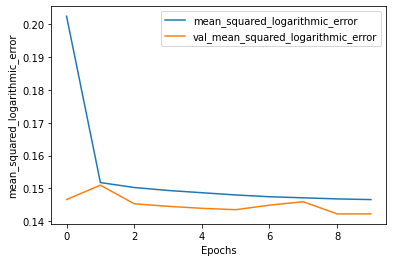

In [21]:
def plot_history(history, key):
    plt.plot(history.history[key])
    plt.plot(history.history['val_'+key])
    plt.xlabel("Epochs")
    plt.ylabel(key)
    plt.legend([key, 'val_'+key])
    plt.show()
# Plot the history
plot_history(historyf,'mean_squared_logarithmic_error')

# Accuracy of model

In [22]:
test_pred = model.predict(test_dataf_std)

3811/3811 [==============================] - 6s 1ms/step


In [23]:
r2_dataf_dnn_score_test = r2_score(test_targetf, test_pred)
r2_dataf_dnn_score_test

0.39264977395285294

# Saving the model

In [18]:
#!pip install pickle-mixin

In [20]:
#import pickle
#pickle.dump(model, open('usedcarPrediction_concatinet_final_data.pkl', 'wb'))

INFO:tensorflow:Assets written to: ram://f8da407b-128e-4f73-b331-960841e156b5/assets


In [24]:
model.save('DNN_car_full_data.h5')